In [1]:
import pandas as pd 
import numpy as np 

In [2]:
orig_df = pd.read_excel('../../data/2022-shcc-incident-data.xlsx')
orig_df.drop(0, inplace=True)

In [3]:
orig_df.columns

Index(['Attack date', 'Country', 'Country ISO', 'Perpetrator ',
       'Reported Perpetrator Name', 'Weapon Carried/Used',
       'Total number of attacks on facilities which reported destruction',
       'Total number of attacks on facilities which reported damage',
       'Forceful Entry into Health Facility', 'Occupation of Health Facility',
       'Health transportation destroyed', 'Health transportation damaged',
       'Health transportation stolen/highjacked',
       'Looting/Theft/Robbery/Burglary of Health Supplies',
       'Obstruction to Health Care', 'Total health worker killed',
       'Total health worker injured', 'Total health worker kidnapped',
       'Total health worker arrested ', 'Known Kidnapping or Arrest Outcome',
       'Health Workers Threatened', 'Health Workers Assaulted',
       'Health Workers Sexually Assaulted',
       'Reported Health Worker Profession', 'Health Workers Killed',
       'International Health Workers Working Within The Aid System Kill',
 

In [4]:
df = orig_df[[
    'Country',
    'Looting/Theft/Robbery/Burglary of Health Supplies',
    'Total number of attacks on facilities which reported destruction',
    "Total number of attacks on facilities which reported damage",
    "Total health worker killed",
    "Total health worker injured",
    "Total health worker kidnapped",
    "Total health worker arrested ",
    "Health transportation destroyed",
    "Health transportation damaged",
    "Health transportation stolen/highjacked",
]]

In [5]:
df['Infrastructure Looting'] = df['Looting/Theft/Robbery/Burglary of Health Supplies'] + df['Total number of attacks on facilities which reported destruction']
df['Attacks on Health Care Workers'] = df['Total health worker killed'] + df['Total health worker injured'] + df['Total health worker kidnapped'] + df['Total health worker arrested ']
df['Facilities damaged/destroyed'] = df['Total number of attacks on facilities which reported destruction'] + df['Total number of attacks on facilities which reported damage']
df['Healthcare Transportation damaged/destroyed'] = df['Health transportation destroyed'] + df['Health transportation damaged'] + df['Health transportation stolen/highjacked']

C:\Users\patel\AppData\Local\Temp\ipykernel_34332\2331817322.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Infrastructure Looting'] = df['Looting/Theft/Robbery/Burglary of Health Supplies'] + df['Total number of attacks on facilities which reported destruction']
C:\Users\patel\AppData\Local\Temp\ipykernel_34332\2331817322.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Attacks on Health Care Workers'] = df['Total health worker killed'] + df['Total health worker injured'] + df['Total health

In [8]:
pdf = pd.DataFrame(df.groupby('Country')[[
    'Infrastructure Looting', 
    'Attacks on Health Care Workers', 
    'Facilities damaged/destroyed', 
    'Healthcare Transportation damaged/destroyed',
]].sum())
pdf.reset_index(inplace=True)

In [24]:
# start clustering of countries

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(pdf.drop('Country', axis=1))
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
pdf['Cluster'] = kmeans.labels_

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0, 0.5, 'PCA 2')

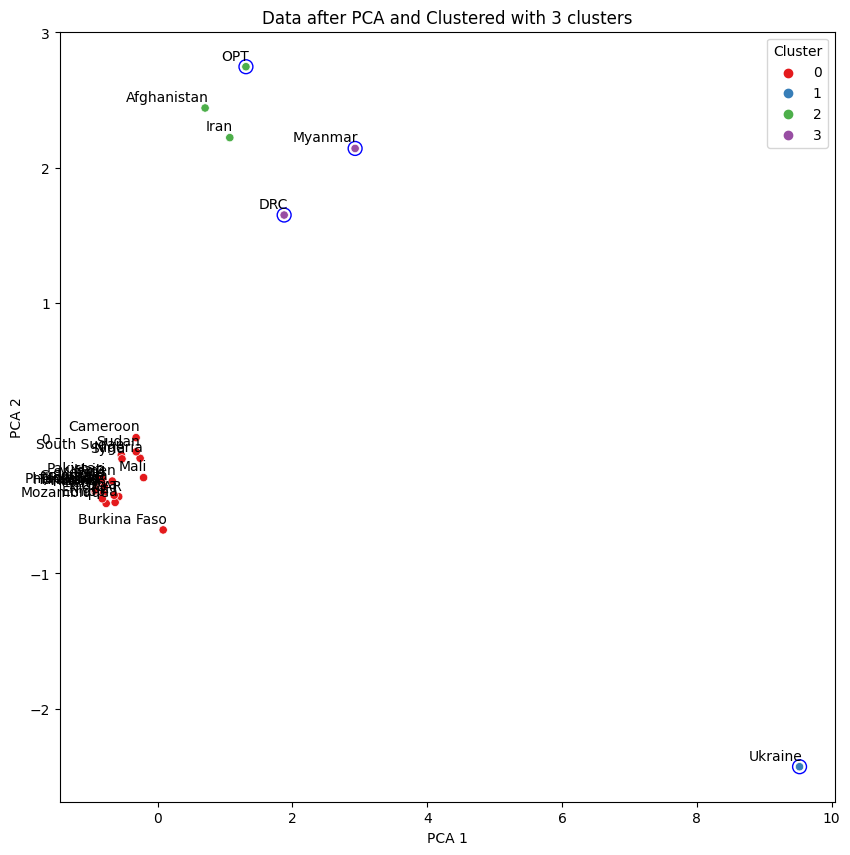

In [25]:
# visualize theses clusters after PCA

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

PCA = PCA(n_components=2)
X_pca = PCA.fit_transform(X)

plt.figure(figsize=(10, 10))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=pdf['Cluster'], palette='Set1')

spacing = 0.05
for i in range(len(pdf)):
    plt.text(X_pca[:,0][i] + spacing, X_pca[:,1][i] + spacing, pdf['Country'].iloc[i], ha='right')

# Highlight OPT, Ukraine, Myanmar, and DRC in the plot
plt.scatter(X_pca[:,0][pdf['Country'] == 'OPT'], X_pca[:,1][pdf['Country'] == 'OPT'], s=100, c='none', marker='o', facecolors='none', edgecolor='blue')
plt.scatter(X_pca[:,0][pdf['Country'] == 'Ukraine'], X_pca[:,1][pdf['Country'] == 'Ukraine'], s=100, c='none', marker='o', facecolors='none', edgecolor='blue')
plt.scatter(X_pca[:,0][pdf['Country'] == 'Myanmar'], X_pca[:,1][pdf['Country'] == 'Myanmar'], s=100, c='none', marker='o', facecolors='none', edgecolor='blue')
plt.scatter(X_pca[:,0][pdf['Country'] == 'DRC'], X_pca[:,1][pdf['Country'] == 'DRC'], s=100, c='none', marker='o', facecolors='none', edgecolor='blue')

plt.title('Data after PCA and Clustered with 3 clusters')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')


In [32]:
pdf[pdf['Cluster'] == 3]['Country'].to_list()

['DRC', 'Myanmar']